In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
data = pd.read_csv('/Users/chloeling3/Desktop/hotel_bookings.csv')
data.head()

# seed = 12345 
# use cross validation 10 
# subset for training and test for each 
# for each model, pick parameter setting that was optiminal and compare on test 
# ensemble method with all the methods, with our test 


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [117]:
data.info()

## look at the correlation between features and train a model based on that
## recursive feature elimination, looks at groups of variables and tries to 
## find groups of variables that are jointly more predictive than just using 
## a single group 

# Run XGBoost - ensemble - combination boosting and random forest 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [118]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


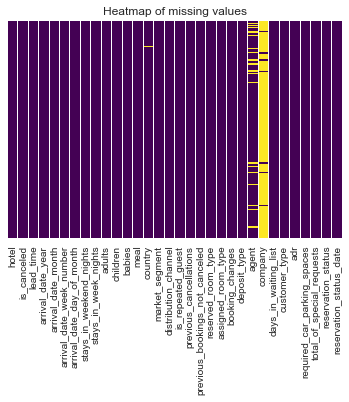

In [119]:
## missing data 
plt.title("Heatmap of missing values")
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


## roughly 25% of agent data is missing, almost all of company data is missing 
# check country 

In [120]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Text(0.5, 1.0, 'Barchart of Cancellations in City vs Resort  ')

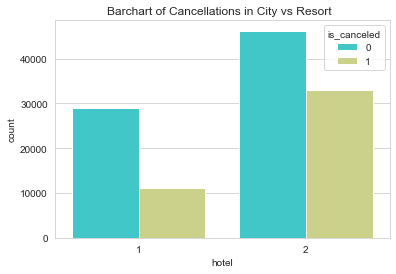

In [161]:
sns.set_style('whitegrid')
sns.countplot(x='hotel', hue = 'is_canceled', data=data, palette='rainbow')
plt.title("Barchart of Cancellations in City vs Resort  ")

In [122]:
## Converting Categorical Features 
## Changed all categorial features, mapped to a dictionary 

# drop null values 

data.drop(['company'],axis=1,inplace=True)
data.drop(['agent'],axis=1,inplace=True)

#hotel = pd.get_dummies(data['hotel'], drop_first = True)
#data.drop(['hotel'],axis=1,inplace=True)
#data = pd.concat([data, hotel])
#data.fillna(1, inplace = True)


In [123]:
d = {'Resort Hotel': 1, 'City Hotel':2 }
data.hotel = data.hotel.map(d, na_action='ignore')

In [124]:
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September': 9, 'October': 10, 'November': 11, 'December': 12 }
data.arrival_date_month = data.arrival_date_month.map(d, na_action='ignore')



In [125]:
data.meal.unique()

d = {'BB':1, 'FB':2, 'HB':3, 'SC':4, 'Undefined':5 }
data.meal = data.meal.map(d, na_action='ignore')


In [126]:
data.country.unique()

d = {'PRT':1, 'GBR':2, 'USA':3, 'ESP':4, 'IRL':5, 'FRA':6, 'ROU':7, 'NOR':8, 'OMN':9,
       'ARG':10, 'POL':11, 'DEU':12, 'BEL':13, 'CHE':14, 'CN':15, 'GRC':16, 'ITA':17, 'NLD':18,
       'DNK':19, 'RUS':20, 'SWE':21, 'AUS':22, 'EST':23, 'CZE':24, 'BRA':25, 'FIN':26, 'MOZ':27,
       'BWA':28, 'LUX':29, 'SVN':30, 'ALB':31, 'IND':32, 'CHN':33, 'MEX':34, 'MAR':35, 'UKR':36,
       'SMR':37, 'LVA':38, 'PRI':39, 'SRB':40, 'CHL':41, 'AUT':42, 'BLR':43, 'LTU':44, 'TUR':45,
       'ZAF':46, 'AGO':47, 'ISR':48, 'CYM':49, 'ZMB':50, 'CPV':51, 'ZWE':52, 'DZA':53, 'KOR':54,
       'CRI':55, 'HUN':56, 'ARE':57, 'TUN':58, 'JAM':59, 'HRV':60, 'HKG':61, 'IRN':62, 'GEO':63,
       'AND':64, 'GIB':65, 'URY':66, 'JEY':67, 'CAF':68, 'CYP':69, 'COL':70, 'GGY':71, 'KWT':72,
       'NGA':73, 'MDV':74, 'VEN':75, 'SVK':76, 'FJI':77, 'KAZ':78, 'PAK':79, 'IDN':80, 'LBN':81,
       'PHL':82, 'SEN':83, 'SYC':84, 'AZE':85, 'BHR':86, 'NZL':87, 'THA':88, 'DOM':89, 'MKD':90,
       'MYS':91, 'ARM':92, 'JPN':93, 'LKA':94, 'CUB':95, 'CMR':96, 'BIH':97, 'MUS':98, 'COM':99,
       'SUR':100, 'UGA':101, 'BGR':102, 'CIV':103, 'JOR':104, 'SYR':105, 'SGP':106, 'BDI':107, 'SAU':108,
       'VNM':109, 'PLW':110, 'QAT':111, 'EGY':112, 'PER':113, 'MLT':114, 'MWI':115, 'ECU':116, 'MDG':117,
       'ISL':118, 'UZB':119, 'NPL':120, 'BHS':121, 'MAC':122, 'TGO':123, 'TWN':124, 'DJI':125, 'STP':126,
       'KNA':127, 'ETH':128, 'IRQ':129, 'HND':130, 'RWA':131, 'KHM':132, 'MCO':133, 'BGD':134, 'IMN':135,
       'TJK':136, 'NIC':137, 'BEN':138, 'VGB':139, 'TZA':140, 'GAB':141, 'GHA':142, 'TMP':143, 'GLP':144,
       'KEN':145, 'LIE':146, 'GNB':147, 'MNE':148, 'UMI':149, 'MYT':150, 'FRO':151, 'MMR':152, 'PAN':153,
       'BFA':154, 'LBY':155, 'MLI':156, 'NAM':157, 'BOL':158, 'PRY':159, 'BRB':160, 'ABW':161, 'AIA':162,
       'SLV':163, 'DMA':164, 'PYF':165, 'GUY':166, 'LCA':167, 'ATA':168, 'GTM':169, 'ASM':170, 'MRT':171,
       'NCL':172, 'KIR':173, 'SDN':174, 'ATF':175, 'SLE':176, 'LAO':177 }

data.country = data.country.map(d, na_action='ignore')


In [127]:
data.market_segment.unique()

d = {'Direct':1, 'Corporate':2, 'Online TA':3, 'Offline TA/TO':4,
       'Complementary':5, 'Groups':6, 'Undefined':7, 'Aviation':8 }
data.market_segment = data.market_segment.map(d, na_action='ignore')



In [128]:
data.distribution_channel.unique()

d = {'Direct':1, 'Corporate':2, 'TA/TO':3, 'Undefined':4, 'GDS':5}

data.distribution_channel = data.distribution_channel.map(d, na_action='ignore')


In [129]:
data.reserved_room_type.unique()

d = {'C':1, 'A':2, 'D':3, 'E':4, 'G':5, 'F':6, 'H':7, 'L':8, 'P':9, 'B':10}

data.reserved_room_type = data.reserved_room_type.map(d, na_action='ignore')


In [130]:
data.assigned_room_type.unique()

d = {'C':1, 'A':2, 'D':3, 'E':4, 'G':5, 'F':6, 'I':7, 'B':8, 'H':9, 'P':10, 'L':11, 'K':12}

data.assigned_room_type = data.assigned_room_type.map(d, na_action='ignore')



In [131]:
data.deposit_type.unique()

d = {'No Deposit':1, 'Refundable':2, 'Non Refund':3}

data.deposit_type = data.deposit_type.map(d, na_action='ignore')


In [132]:
data.customer_type.unique()

d = {'Transient':1, 'Contract':2, 'Transient-Party':3, 'Group':4}

data.customer_type = data.customer_type.map(d, na_action='ignore')


In [133]:
data.reservation_status.unique()

d = {'Check-Out':1, 'Canceled':2, 'No-Show':3}

data.reservation_status = data.reservation_status.map(d, na_action='ignore')


In [134]:
data.drop(['reservation_status_date'],axis=1,inplace=True)

In [135]:
data[data['children'].isnull()]



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
40600,2,1,2,2015,8,32,3,1,0,2,...,10,8,0,1,0,3,12.0,0,1,2
40667,2,1,1,2015,8,32,5,0,2,2,...,10,8,0,1,0,3,12.0,0,1,2
40679,2,1,1,2015,8,32,5,0,2,3,...,10,8,0,1,0,3,18.0,0,2,2
41160,2,1,8,2015,8,33,13,2,5,2,...,10,8,0,1,0,3,76.5,0,1,2


In [136]:
### ALL THE NULL VALUES FOR COUNTRY ** LOOK AGAIN HERE TO CORRECT 
data[data['country'].isnull()]

## dropping Country feature for now, can add in later 
data.drop(['country'],axis=1,inplace=True)


In [137]:
data = data.drop([data.index[40600], data.index[40667], data.index[40679], data.index[41160]])



In [138]:
data[data['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status


In [139]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

[0.01334743 0.12831803 0.02172578 0.03732903 0.05454338 0.06472357
 0.03566924 0.05272746 0.02020629 0.00927365 0.00155937 0.01669068
 0.04889059 0.01450094 0.0051126  0.03234755 0.00214575 0.01790345
 0.02815813 0.02383212 0.17884059 0.00310945 0.02736191 0.08151486
 0.02142327 0.05874484]


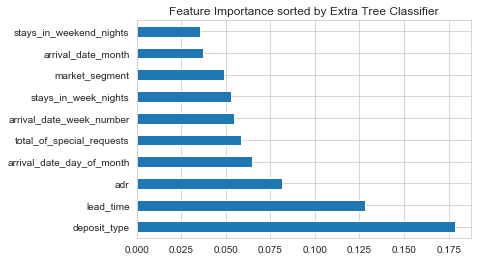

In [140]:
## Used Extra Tree Classifier to extract the top 3 features of the dataset 
## Decision trees make splits that maximize the decrease in impurity 
## By calculating the mean decrease in impurity for each feature across all trees, we can know that feature's importance 

X = data[['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
          'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
         'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 
         'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list',
         'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']]                                         
y = data['is_canceled']

from sklearn.ensemble import ExtraTreesClassifier 
model = ExtraTreesClassifier(n_estimators=100, random_state=0)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers 

#plot 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance sorted by Extra Tree Classifier')
plt.show()

## could we select those features with more than 0.01 for model training? 


In [141]:
## Building the Logistical Regression 


# test train split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Cross Validation on training to identify best parameter values 

# training and predicting 
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train) # final model, assuming default values are best 

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Evaluation 
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)


/Users/chloeling3/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.78      0.95      0.85     24738
           1       0.86      0.54      0.66     14660

    accuracy                           0.79     39398
   macro avg       0.82      0.74      0.76     39398
weighted avg       0.81      0.79      0.78     39398

AUC: 0.742


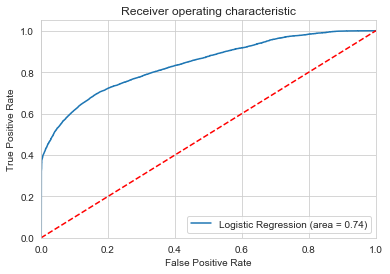

In [142]:
## Logistical Regression ROC Curveform sklearn import metrics

logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [143]:
## Cross Validation k fold

from sklearn import model_selection 

from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits = 10, random_state = 7)
modelCV = logmodel 
scoring = 'accuracy' 
result = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring = scoring)
print("10-fold cross validation average accuracy: %.3f" % (result.mean()))



/Users/chloeling3/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chloeling3/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chloeling3/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chloeling3/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chloeling3/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

10-fold cross validation average accuracy: 0.796


In [144]:
## Evaluation 
predictions = modelCV.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc) 

              precision    recall  f1-score   support

           0       0.78      0.95      0.85     24738
           1       0.86      0.54      0.66     14660

    accuracy                           0.79     39398
   macro avg       0.82      0.74      0.76     39398
weighted avg       0.81      0.79      0.78     39398

AUC: 0.742


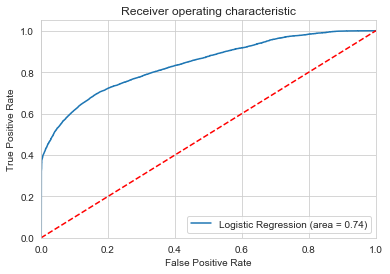

In [145]:
logit_roc_auc = roc_auc_score(y_test, modelCV.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [146]:
### Building the Random Forest 

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='entropy', n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     24738
           1       0.87      0.76      0.81     14660

    accuracy                           0.87     39398
   macro avg       0.87      0.84      0.85     39398
weighted avg       0.87      0.87      0.86     39398

AUC: 0.742


In [147]:
X_train.columns


Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

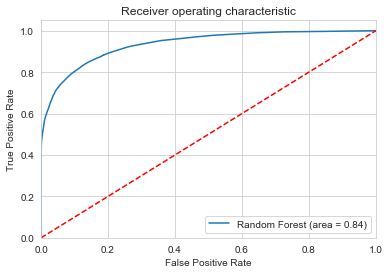

In [148]:
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [149]:
X_train.drop(['arrival_date_year'],axis=1,inplace=True)
X_test.drop(['arrival_date_year'],axis=1,inplace=True)

/Users/chloeling3/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [150]:
X_train.columns

Index(['hotel', 'lead_time', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [151]:
## XG Boost, decision tree based ensemble ML algorithm, uses gradient boosting 

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# transform data to DMatrix format (simple one-linear to transform a numpy array of data)
# so that xgboost can use our data 

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [152]:
pred = model.predict(X_test)
print(classification_report(y_test,pred))
auc = roc_auc_score(y_test, pred)
print('AUC: %.3f' % auc)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     24738
           1       0.85      0.71      0.77     14660

    accuracy                           0.84     39398
   macro avg       0.84      0.82      0.83     39398
weighted avg       0.84      0.84      0.84     39398

AUC: 0.816


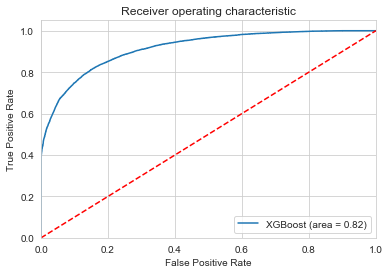

In [153]:
model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [154]:
### Building the KNN 

# K = 1 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,predictions))
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)

              precision    recall  f1-score   support

           0       0.78      0.95      0.85     24738
           1       0.86      0.54      0.66     14660

    accuracy                           0.79     39398
   macro avg       0.82      0.74      0.76     39398
weighted avg       0.81      0.79      0.78     39398

AUC: 0.742


Text(0, 0.5, 'Error Rate')

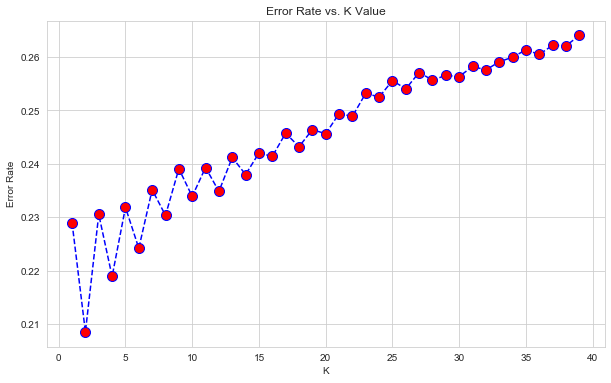

In [155]:
## Chosing a K value using the elbow method 

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i) # create the model 
    knn.fit(X_train,y_train) # fit the model 
    pred_i = knn.predict(X_test) # predict 
    error_rate.append(np.mean(pred_i != y_test)) # average error rate 
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



In [156]:
# k = 2 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)



              precision    recall  f1-score   support

           0       0.78      0.92      0.85     24738
           1       0.82      0.57      0.67     14660

    accuracy                           0.79     39398
   macro avg       0.80      0.75      0.76     39398
weighted avg       0.80      0.79      0.78     39398

AUC: 0.742


In [157]:
# k = 3 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,predictions))
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)



              precision    recall  f1-score   support

           0       0.78      0.95      0.85     24738
           1       0.86      0.54      0.66     14660

    accuracy                           0.79     39398
   macro avg       0.82      0.74      0.76     39398
weighted avg       0.81      0.79      0.78     39398

AUC: 0.742


In [ ]:
### Building the SVM 

from sklearn.svm import SVC
model = SVC(kernel='linear', cache_size=7000)
#model = svm.SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions)) 




In [ ]:
# Gridsearch for the right parameters for SVM, C and gamma 

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf', 'sigmoid', 'poly']} 
model.fit(X_train,y_train)
model.best_params_
model.best_estimator_
grid_predictions = model.predict(X_test)
print(classification_report(y_test,grid_predictions))


## RESORT 

In [103]:
## Analyzing Resort Hotels 

# d = {'Resort Hotel': 1, 'City Hotel':2 }

df1 = data.loc[data['hotel'].isin(['1'])]


In [106]:
## Building the Logistical Regression 

from sklearn.model_selection import train_test_split
X1 = df1[['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
          'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
         'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 
         'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list',
         'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']]                                         
y1 = df1['is_canceled']
                         

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

# training and predicting 
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X1_train,y1_train)
predictions = logmodel.predict(X1_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Evaluation 
predictions = logmodel.predict(X1_test)

from sklearn.metrics import classification_report
print(classification_report(y1_test,predictions))

auc = roc_auc_score(y1_test, predictions)
print('AUC: %.3f' % auc)

/Users/chloeling3/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.80      0.96      0.87      9555
           1       0.78      0.38      0.51      3665

    accuracy                           0.80     13220
   macro avg       0.79      0.67      0.69     13220
weighted avg       0.79      0.80      0.77     13220

AUC: 0.671


In [163]:
logmodel_roc_auc = roc_auc_score(y_test, logmodel.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % logmodel_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [39398, 13220]

In [113]:
### Building the Random Forest 

from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(n_estimators=100)
rfc1.fit(X1_train, y1_train)
rfc1_pred = rfc1.predict(X1_test)
print(classification_report(y1_test,rfc1_pred))
auc = roc_auc_score(y1_test, predictions)
print('AUC: %.3f' % auc)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      9555
           1       0.82      0.67      0.74      3665

    accuracy                           0.87     13220
   macro avg       0.85      0.81      0.83     13220
weighted avg       0.87      0.87      0.86     13220

AUC: 0.671


In [114]:
rfc1_roc_auc = roc_auc_score(y_test, rfc1.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc1.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rfc1_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [39398, 13220]

In [38]:
### Building the KNN 

from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=2)
knn1.fit(X1_train,y1_train)
pred1 = knn1.predict(X1_test)
print(classification_report(y1_test,pred1))
auc = roc_auc_score(y1_test, predictions)
print('AUC: %.3f' % auc)

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      9555
           1       0.70      0.39      0.50      3665

    accuracy                           0.79     13220
   macro avg       0.75      0.66      0.68     13220
weighted avg       0.77      0.79      0.76     13220

AUC: 0.667


In [43]:
### Building the SVM 

from sklearn.svm import SVC
model = SVC()
model.fit(X1_train,y1_train)
predictions = model.predict(X1_test)
print(classification_report(y1_test,predictions))
auc = roc_auc_score(y1_test, predictions)
print('AUC: %.3f' % auc)


/Users/chloeling3/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.80      0.97      0.88      9555
           1       0.84      0.36      0.51      3665

    accuracy                           0.80     13220
   macro avg       0.82      0.67      0.69     13220
weighted avg       0.81      0.80      0.78     13220

AUC: 0.668


In [166]:
# XG Boost 

model = XGBClassifier()
model.fit(X1_train, y1_train)

pred = model.predict(X1_test)
print(classification_report(y1_test,pred))
auc = roc_auc_score(y1_test, pred)
print('AUC: %.3f' % auc)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      9555
           1       0.79      0.67      0.73      3665

    accuracy                           0.86     13220
   macro avg       0.84      0.80      0.82     13220
weighted avg       0.86      0.86      0.86     13220

AUC: 0.803


## CITY 

In [177]:
## Analyzing City Hotels 

df2 = data.loc[data['hotel'].isin(['2'])]

In [178]:
# Logistic Regression 

from sklearn.model_selection import train_test_split
X2 = df2[['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
          'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
         'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 
         'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list',
         'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']]                                         
y2 = df2['is_canceled']
                         

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

# training and predicting 
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X2_train,y2_train)
predictions = logmodel.predict(X2_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Evaluation 
predictions = logmodel.predict(X2_test)

from sklearn.metrics import classification_report
print(classification_report(y2_test,predictions))

auc = roc_auc_score(y2_test, predictions)
print('AUC: %.3f' % auc)

/Users/chloeling3/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.76      0.94      0.84     15265
           1       0.88      0.59      0.71     10913

    accuracy                           0.80     26178
   macro avg       0.82      0.77      0.78     26178
weighted avg       0.81      0.80      0.79     26178

AUC: 0.767


In [179]:
X2_train.drop(['arrival_date_year'],axis=1,inplace=True)
X2_test.drop(['arrival_date_year'],axis=1,inplace=True)


/Users/chloeling3/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [180]:
# XG Boost 

model = XGBClassifier()
model.fit(X2_train, y2_train)

pred = model.predict(X2_test)
print(classification_report(y2_test,pred))
auc = roc_auc_score(y2_test, pred)
print('AUC: %.3f' % auc)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     15265
           1       0.87      0.75      0.81     10913

    accuracy                           0.85     26178
   macro avg       0.85      0.83      0.84     26178
weighted avg       0.85      0.85      0.85     26178

AUC: 0.835


In [41]:
## is the cancellation easier to predcit 
## precision 


### Building the Random Forest 

from sklearn.ensemble import RandomForestClassifier

rfc2 = RandomForestClassifier(n_estimators=100)
rfc2.fit(X2_train, y2_train)
rfc2_pred = rfc2.predict(X2_test)
print(classification_report(y2_test,rfc2_pred))
auc = roc_auc_score(y2_test, predictions)
print('AUC: %.3f' % auc)



              precision    recall  f1-score   support

           0       0.86      0.93      0.89     15265
           1       0.88      0.79      0.83     10913

    accuracy                           0.87     26178
   macro avg       0.87      0.86      0.86     26178
weighted avg       0.87      0.87      0.87     26178

AUC: 0.767


In [48]:
### Building the KNN 

from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X2_train,y2_train)
pred2 = knn1.predict(X2_test)
print(classification_report(y2_test,pred2))
auc = roc_auc_score(y2_test, pred2)
print('AUC: %.3f' % auc)

              precision    recall  f1-score   support

           0       0.59      0.90      0.71     15265
           1       0.49      0.14      0.22     10913

    accuracy                           0.58     26178
   macro avg       0.54      0.52      0.47     26178
weighted avg       0.55      0.58      0.51     26178

AUC: 0.519


In [49]:
### Building the SVM 

from sklearn.svm import SVC
model = SVC()
model.fit(X2_train,y2_train)
predictions = model.predict(X2_test)
print(classification_report(y2_test,predictions))
auc = roc_auc_score(y2_test, predictions)
print('AUC: %.3f' % auc)


/Users/chloeling3/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.78      0.94      0.85     15265
           1       0.87      0.62      0.73     10913

    accuracy                           0.80     26178
   macro avg       0.82      0.78      0.79     26178
weighted avg       0.82      0.80      0.80     26178

AUC: 0.778


In [ ]:
## Ensemble of all models 
## Take the average of prediction probability, majority vote from predictions, of classifiers 
## unsupervised so will not overfit 
## feature importance - features with most impact on that prediction 